# Homework 1 MA course in Artificial Intelligence 2022/2023



 ## @author: Filippo Casari 

In [1]:
#!rm -r AI2022MA
#!git clone https://github.com/UmbertoJr/AI2022MA.git

# Iterated Local Search for the Travelling Salesman Problem

Let's read the standard TSP instance called 'd198.tsp'

name: d198
nPoints: 198
best_sol: 15780.0


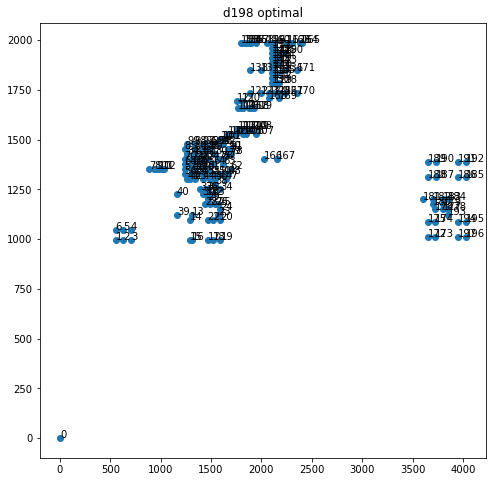

In [2]:
#from IO_manager.io_tsp import TSP_Instance_Creator
# if you are running not from your local add the prefix AI2022MA (comment the previous line and uncomment the following line)
from AI2022MA.IO_manager.io_tsp import TSP_Instance_Creator

ic = TSP_Instance_Creator("standard", 'd198.tsp') 
ic.print_info()
ic.plot_data()

## 2-opt

&nbsp;

Here is an example of how to use our black-box 2-opt implementation. As you saw in ["Introduction to the TSP"](https://colab.research.google.com/github/UmbertoJr/AI2020/blob/master/introduction_to_the_TSP.ipynb#scrollTo=4aGR4Nus83wa), the meta-heuristics must respect the input and output format shown in the notebook!

An example of a meta-heuristics format is the shown **naive_heuristic**, where the TwoOpt.local_search is used to improve the solution.

Note that the yield and the ending condition (ending_cond) are used by the Solver_TSP class to break the running after 3 minutes or when the local search is completed.




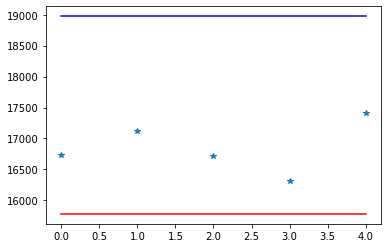

best gap with NN 20.25% on 1 trial,
with a total time of 0.002 seconds

best gap with random + 2opt 3.32% on 5 trials,
with a total time of 0.53 seconds


In [3]:
import numpy as np
from time import time as t
import matplotlib.pyplot as plt

#from solvers.local_search import TwoOpt
#from solvers.TSP_solver import Solver_TSP
#from solvers.constructive_algorithms import Random_Initializer, Nearest_Neighbor
# if you are not running from your local, add the prefix AI2021MA (comment the previous 3 lines and use instead the following 3 lines)
from AI2022MA.solvers.local_search import TwoOpt
from AI2022MA.solvers.TSP_solver import Solver_TSP
from AI2022MA.solvers.constructive_algorithms import Random_Initializer, Nearest_Neighbor

def naive_heuristic(solution, cost_sol, dist_matrix):
  for data in TwoOpt.local_search(solution, cost_sol, dist_matrix): 
    new_solution, new_cost, number_calls_ls, ending_cond = data
    yield  new_solution, new_cost, number_calls_ls, ending_cond

number_of_trials = 5
found_lens = []
start = t()
solver = Solver_TSP(('random', Random_Initializer.random_method))
solver.bind(('naive heuristic', naive_heuristic ))

for _ in range(number_of_trials):
  solver(ic)
  found_lens.append(solver.found_length)
end = t()

solver = Solver_TSP(('nearest neighbor', Nearest_Neighbor.nn))
solver(ic)

plt.plot(found_lens, "*")
plt.plot(np.ones(number_of_trials)*ic.best_sol, "r-")
plt.plot(np.ones(number_of_trials)*solver.found_length, "b-")
plt.show()
print(f"best gap with NN {solver.gap}% on 1 trial,\nwith a total time of {np.round(solver.time_to_solve, 5)} seconds")
print()
print(f"best gap with random + 2opt {np.round(100*(min(found_lens) - ic.best_sol)/ic.best_sol, 2)}% on {number_of_trials} trials,\nwith a total time of {np.round(end - start, 2)} seconds")

## Double Bridge

Here you need to implement your own Double Bridge permutation!

In [4]:
from math import remainder
from AI2022MA.solvers.local_search import compute_lenght
from solvers.constructive_algorithms import compute_length
import random
# get 4-opt algorithm


class DoubleBridge:
    @staticmethod
    def difference_cost(solution, a, b, c, d, matrix):
        """computing the permutation

        Args:
            solution (ArrayLike): old solution array
            a (ArrayLike): 
            b (ArrayLike): 
            c (ArrayLike):
            d (ArrayLike): 
            matrix (_type_):

        Returns:
           ArrayLike, double/float: new solution vector, new cost
        """
        #print("a: ", a)
        #print("b: ", b)
        #print("c: ", c)
        #print("d: ", d)
        #print("distance a-d", matrix[a-1][d])
        #print("distance a-d", matrix[d-1][c])
        #difference = #matrix[a-1][b]+matrix[c-1][b] - matrix[a-1][c-1]+matrix[b][d]
        
            
        
        return 

    @staticmethod
    def perturb_solution(solution, actual_cost, matrix):
        """Perturb the solution with 4opt algorithm

        Args:
            solution ([ArrayLike]): [old solution]
            actual_cost ([float,double]): [cost of the old solution]
            matrix ([ArrayLike]): [distance matrix]

        Returns:
            [solution, actual_cost]: [new solution, cost of the new solution]
        """
        #l = int((solution.shape[0])/4)  # length_graph
        #remainder = solution.shape[0] % 4
        #remainder_list = list(range(1, remainder+1))
        
        ind = np.sort(list(set(random.choices(range(0, solution.shape[0]-1),k= 4))))
        while(len(ind)<4):
            ind = np.sort(list(set(random.choices(range(0, solution.shape[0]-1),k= 4))))
            #print(ind)
            
        
        #l=len(solution)
        #print(type(solution))
        #print(ind[3]-l, ind[0], ind[1], ind[2], ind[3])
        a, b, c, d = (solution[ind[3]:]).tolist()+solution[:ind[0]].tolist(), (solution[ind[0]: ind[1]]).tolist(),\
            (solution[ind[1]: ind[2]]).tolist(), (solution[ind[2]:ind[3]]).tolist()
        
        a,b,c,d = a,d,c,b
        #print(a,b,c,d)
        #nodes = [a, b, c, d]  
        
        
        new_solution = np.concatenate((a,b,c,d))
        
        
        #print(new_solution)
        #new_cost = compute_lenght(new_solution, matrix)
        new_cost =compute_lenght(new_solution, matrix)
        #DoubleBridge.difference_cost(new_solution,0,ind[0], ind[1], ind[2],  matrix)
        
        '''
        if (remainder != 0):  # if remainder division is not zero then :
            for node, el in zip(nodes[:remainder], remainder_list):
                #print("node ", node,"element to add: ", solution[4*l+el-1])
                it = (np.array([solution[4*l+el-1]]))  # creating the item
                # print(it)
                nodes[el-1] = np.append(nodes[el-1], it)  # adding the item

            a, b, c, d = nodes[0], nodes[1], nodes[2], nodes[3]
        '''
        #solution, actual_cost = DoubleBridge.difference_cost(
        #    solution, a, b, c, d, matrix)  # new cost computed

        return new_solution, new_cost


In [5]:
#from solvers.constructive_algorithms import compute_length
# if you are not running from your local, add the prefix AI2022MA (comment the previous line and uncomment the following line)
from AI2022MA.solvers.constructive_algorithms import compute_length

# example perturbation, changed from 12 nodes to 13 nodes
case_solution = np.arange(12)

matrix = np.random.rand(12, 12)


cost = compute_length(case_solution, matrix)

print(case_solution, cost)

new_sol, new_length = DoubleBridge.perturb_solution(
    case_solution, cost, matrix)
print(new_sol, new_length)


[ 0  1  2  3  4  5  6  7  8  9 10 11] 7.11997722339009
[10 11  0  1  2  7  8  9  5  6  3  4] 6.923927825956689


## Iterated Local Search


Here you need to implement the three variants of the ILS we saw earlier in class.

To boost the time performances please use the cython class **two_opt_with_candidate**. 

In [6]:

#from solvers.local_search import TwoOpt
#from solvers.two_opt_with_candidate import twoOpt_with_cl
# if you are not running from your local, add the prefix AI2022MA (comment the previous lines and uncomment the following lines)
from AI2022MA.solvers.local_search import TwoOpt
from AI2022MA.solvers.two_opt_with_candidate import twoOpt_with_cl
import random
cost_sol_better = []
cost_sol_RW = []
cost_sol_LSMC = []


def my_local_search(solution, cost_sol, dist_matrix):
    new_solution, new_cost = solution, cost_sol
    for data in TwoOpt.local_search(solution, cost_sol, dist_matrix):
        new_solution, new_cost, number_calls_ls, ending_cond = data
    return new_solution, new_cost


def generate_cl(dist_matrix):
    n = dist_matrix.shape[0]
    cl = np.zeros((n, 20))
    for i in range(n):
        cl[i] = np.argsort(dist_matrix[i, :])[1: 21]
    return cl


class ILS_Better:
    @staticmethod
    def solve(solution, actual_cost, matrix):
        global cost_sol_better
        #print("using: ILS better")
        new_sol, new_cost = my_local_search(solution, actual_cost, matrix)
        """
    #  in case you want to use twoOpt_with_cl
    cl = generate_cl(matrix) # remember you don't need to compute the cl each time
    new_sol, new_cost = twoOpt_with_cl(solution, actual_cost, matrix, cl)
    """
        best_sol, best_cost = new_sol, new_cost
        cost_sol_better.append(new_cost)
        ls_calls = 1
        
        while True:
            # implement perturbation
            new_sol, new_cost = DoubleBridge.perturb_solution(
                best_sol, best_cost, matrix) # calling the perturbation function
            new_sol, new_cost = my_local_search(new_sol, new_cost, matrix) # getting the solution from the local search
            #
            # implement acceptance criterion
            if (new_cost < best_cost):
                best_sol, best_cost = new_sol, new_cost
            cost_sol_better.append(new_cost) # appending new cost
            ls_calls = ls_calls + 1 # increase the number of calls
            

            yield best_sol, best_cost, ls_calls, False


class ILS_RW:
    @staticmethod
    def solve(solution, actual_cost, matrix):
        
        #print("using ILS RW")
        global cost_sol_RW
        new_sol, new_cost = my_local_search(solution, actual_cost, matrix)
        best_sol, best_cost = new_sol, new_cost
        cost_sol_RW.append(new_cost)
        ls_calls = 1
        while True:
            # implement perturbation
            new_sol, new_cost = DoubleBridge.perturb_solution(
                best_sol, best_cost, matrix)
            new_sol, new_cost = my_local_search(new_sol, new_cost, matrix)
            # implement acceptance criterion
            best_sol, best_cost = new_sol, new_cost
            cost_sol_RW.append(new_cost)
            
            ls_calls += 1 # increase the number of calls of the local search algorithm
            yield best_sol, best_cost, ls_calls, False

counter = 0
verbose = False
class ILS_LSMC:
    @staticmethod
    def acceptance_criterion(best_cost, new_cost, temperature):
        global counter
        if (new_cost < best_cost):
            best_cost = new_cost
        else:
            prob = np.exp((best_cost-new_cost)/temperature)
            rand_choice=random.random()
            if(prob>rand_choice):
                best_cost = new_cost
                if(verbose):
                    print("exploring solution even though the cost is less that the previous one")
            #
            #choise = random.choices(
            #    [best_cost, new_cost], weights=(1.-prob, prob), k=1)
            #best_cost = choise[0]
            
            if(counter % 5 == 0 and verbose):
                print("probability of acceptance: ",(1.-prob, prob) )
            
            #print("the costs were ", [best_cost, new_cost])
            #print("what I chose: ", best_cost)
            # print(choise[0])
        return best_cost

    @staticmethod
    def solve(solution, actual_cost, matrix):
        
        #print("using LSMC")
        global cost_sol_LSMC
        new_sol, new_cost = my_local_search(solution, actual_cost, matrix)
        best_sol, best_cost = new_sol, new_cost
        cost_sol_LSMC.append(new_cost)
        ls_calls = 1 
        temp = 1000. # initial temperature
        temp_decay = 0.95 # decay factor for temperature
        while True:
            # implement perturbation
            new_sol, new_cost = DoubleBridge.perturb_solution(
                best_sol, best_cost, matrix)
            new_sol, new_cost = my_local_search(new_sol, new_cost, matrix)
            cost_sol_LSMC.append(new_cost)
            # implement acceptance criterion
            best_cost = ILS_LSMC.acceptance_criterion(
                best_cost, new_cost, temp)
            
            ls_calls += 1 # increase calls for local Search
            temp = temp*temp_decay # adjust for temperature
            yield best_sol, best_cost, ls_calls, False


### Example of Table

Take care that you need to change the code in order to satisfy the requirements for the task! 

In [10]:

import pandas as pd

seeds = [0, 123, 333]
time_to_solve = 30 # in seconds

names_instances = ["d198.tsp", "pr439.tsp", "u1060.tsp"]
samples = {name: {} for name in names_instances}
collectors = [cost_sol_better, cost_sol_RW, cost_sol_LSMC]
initializers = ["random", "nearest_neighbors"]
init_functions = [Random_Initializer.random_method, Nearest_Neighbor.nn]
improvements = ["ILS-better", "ILS-RW", "ILS-LSMC"]
improve_functions = [ILS_Better.solve, ILS_RW.solve, ILS_LSMC.solve]
results = []
index = []
for s_ in seeds:
    for i, init in enumerate(initializers):
        for j, improve in enumerate(improvements):
            
            solver = Solver_TSP(
                (init, init_functions[i]), seed_=s_, stop_run_after=time_to_solve)
            solver.bind((improve, improve_functions[j]))
            for name in names_instances:
                instance = TSP_Instance_Creator("standard", name)

                solver(instance)
                index.append((name, instance.best_sol, solver.name_method, s_))
                results.append([solver.found_length, solver.gap,
                               solver.time_to_solve, solver.ls_calls])
                samples[name][improve] = np.round(
                    np.abs(np.array(collectors[j]) - ic.best_sol)/ic.best_sol * 100, 2)
                  
            if j == 0:
              cost_sol_better = []
            elif j == 1:
              cost_sol_RW = []
            else:
              cost_sol_LSMC = []
            

index = pd.MultiIndex.from_tuples(
    index, names=['problem', 'optimal length', 'method', 'seed'])

pd.DataFrame(results, index=index, columns=[
             "tour length", "gap", "time to solve", "calls Local Search"])


[ 48 102 147 195]
[ 53  99 108 132]
[ 1 27 62 83]
[ 21  36  94 184]
[  5  65 159 191]
[ 26  33  38 137]
[26 39 41 54]
[191 277 322 434]
[ 53 104 110 172]
[  0  40  52 118]
[ 14  15 130 190]
[ 13  33  54 133]
[ 21 159 181 185]
[ 50  51 166 192]
[ 70  90 138 166]
[ 22  38  60 191]
[ 23  53 169 174]
[ 26 134 175 179]
[ 28  43  94 175]
[ 42  46 127 186]
[ 74  86  98 189]
[ 11 203 299 340]
[  0  33 132 277]
[ 36 117 137 152]
[ 78 136 174 178]
[ 3 45 62]
[ 27  76 143 158]
[  7  28  92 127]
[ 30  74  77 154]
[ 20  96 122 165]
[ 34  83 128 245]
[ 15  50  87 159]
[  8 108 112 149]
[ 28  82 174 195]
[ 91  94  95 100]
[ 25  33 180 187]
[ 91 115 134 186]
[ 15  75 143 195]
[124 135 142 159]
[  5  56  61 110]
[  6  15  79 144]
[ 29  39 123 180]
[ 39  78 152 173]
[  1  51 155 194]
[ 54  96 167 193]
[ 37 116 153 180]
[12 44 71]
[ 13 130 139 195]
[  8 107 139 155]
[ 42 116 123 192]
[ 17  19  42 150]
[  0 159 170 172]
[ 75 154 163 229]
[ 55  99 135 177]
[119 120 141 169]
[ 59  74 123 127]
[ 15  34  98 1

,,,,tour length,gap,time to solve,calls Local Search
problem,optimal length,method,seed,,,,
d198.tsp,15780.0,"initialized with random, improved with ILS-better",0,15923.0,0.91,30.028,357
pr439.tsp,107217.0,"initialized with random, improved with ILS-better",0,112061.0,4.52,30.083,63
u1060.tsp,224094.0,"initialized with random, improved with ILS-better",0,245622.0,9.61,32.355,8
d198.tsp,15780.0,"initialized with random, improved with ILS-RW",0,16430.0,4.12,30.061,354
pr439.tsp,107217.0,"initialized with random, improved with ILS-RW",0,118144.0,10.19,30.183,60
u1060.tsp,224094.0,"initialized with random, improved with ILS-RW",0,249454.0,11.32,31.786,11
d198.tsp,15780.0,"initialized with random, improved with ILS-LSMC",0,17512.0,10.98,30.066,319
pr439.tsp,107217.0,"initialized with random, improved with ILS-LSMC",0,129461.0,20.75,30.258,58
u1060.tsp,224094.0,"initialized with random, improved with ILS-LSMC",0,258640.0,15.42,32.802,9


<function color at 0x13ff2c9d0>


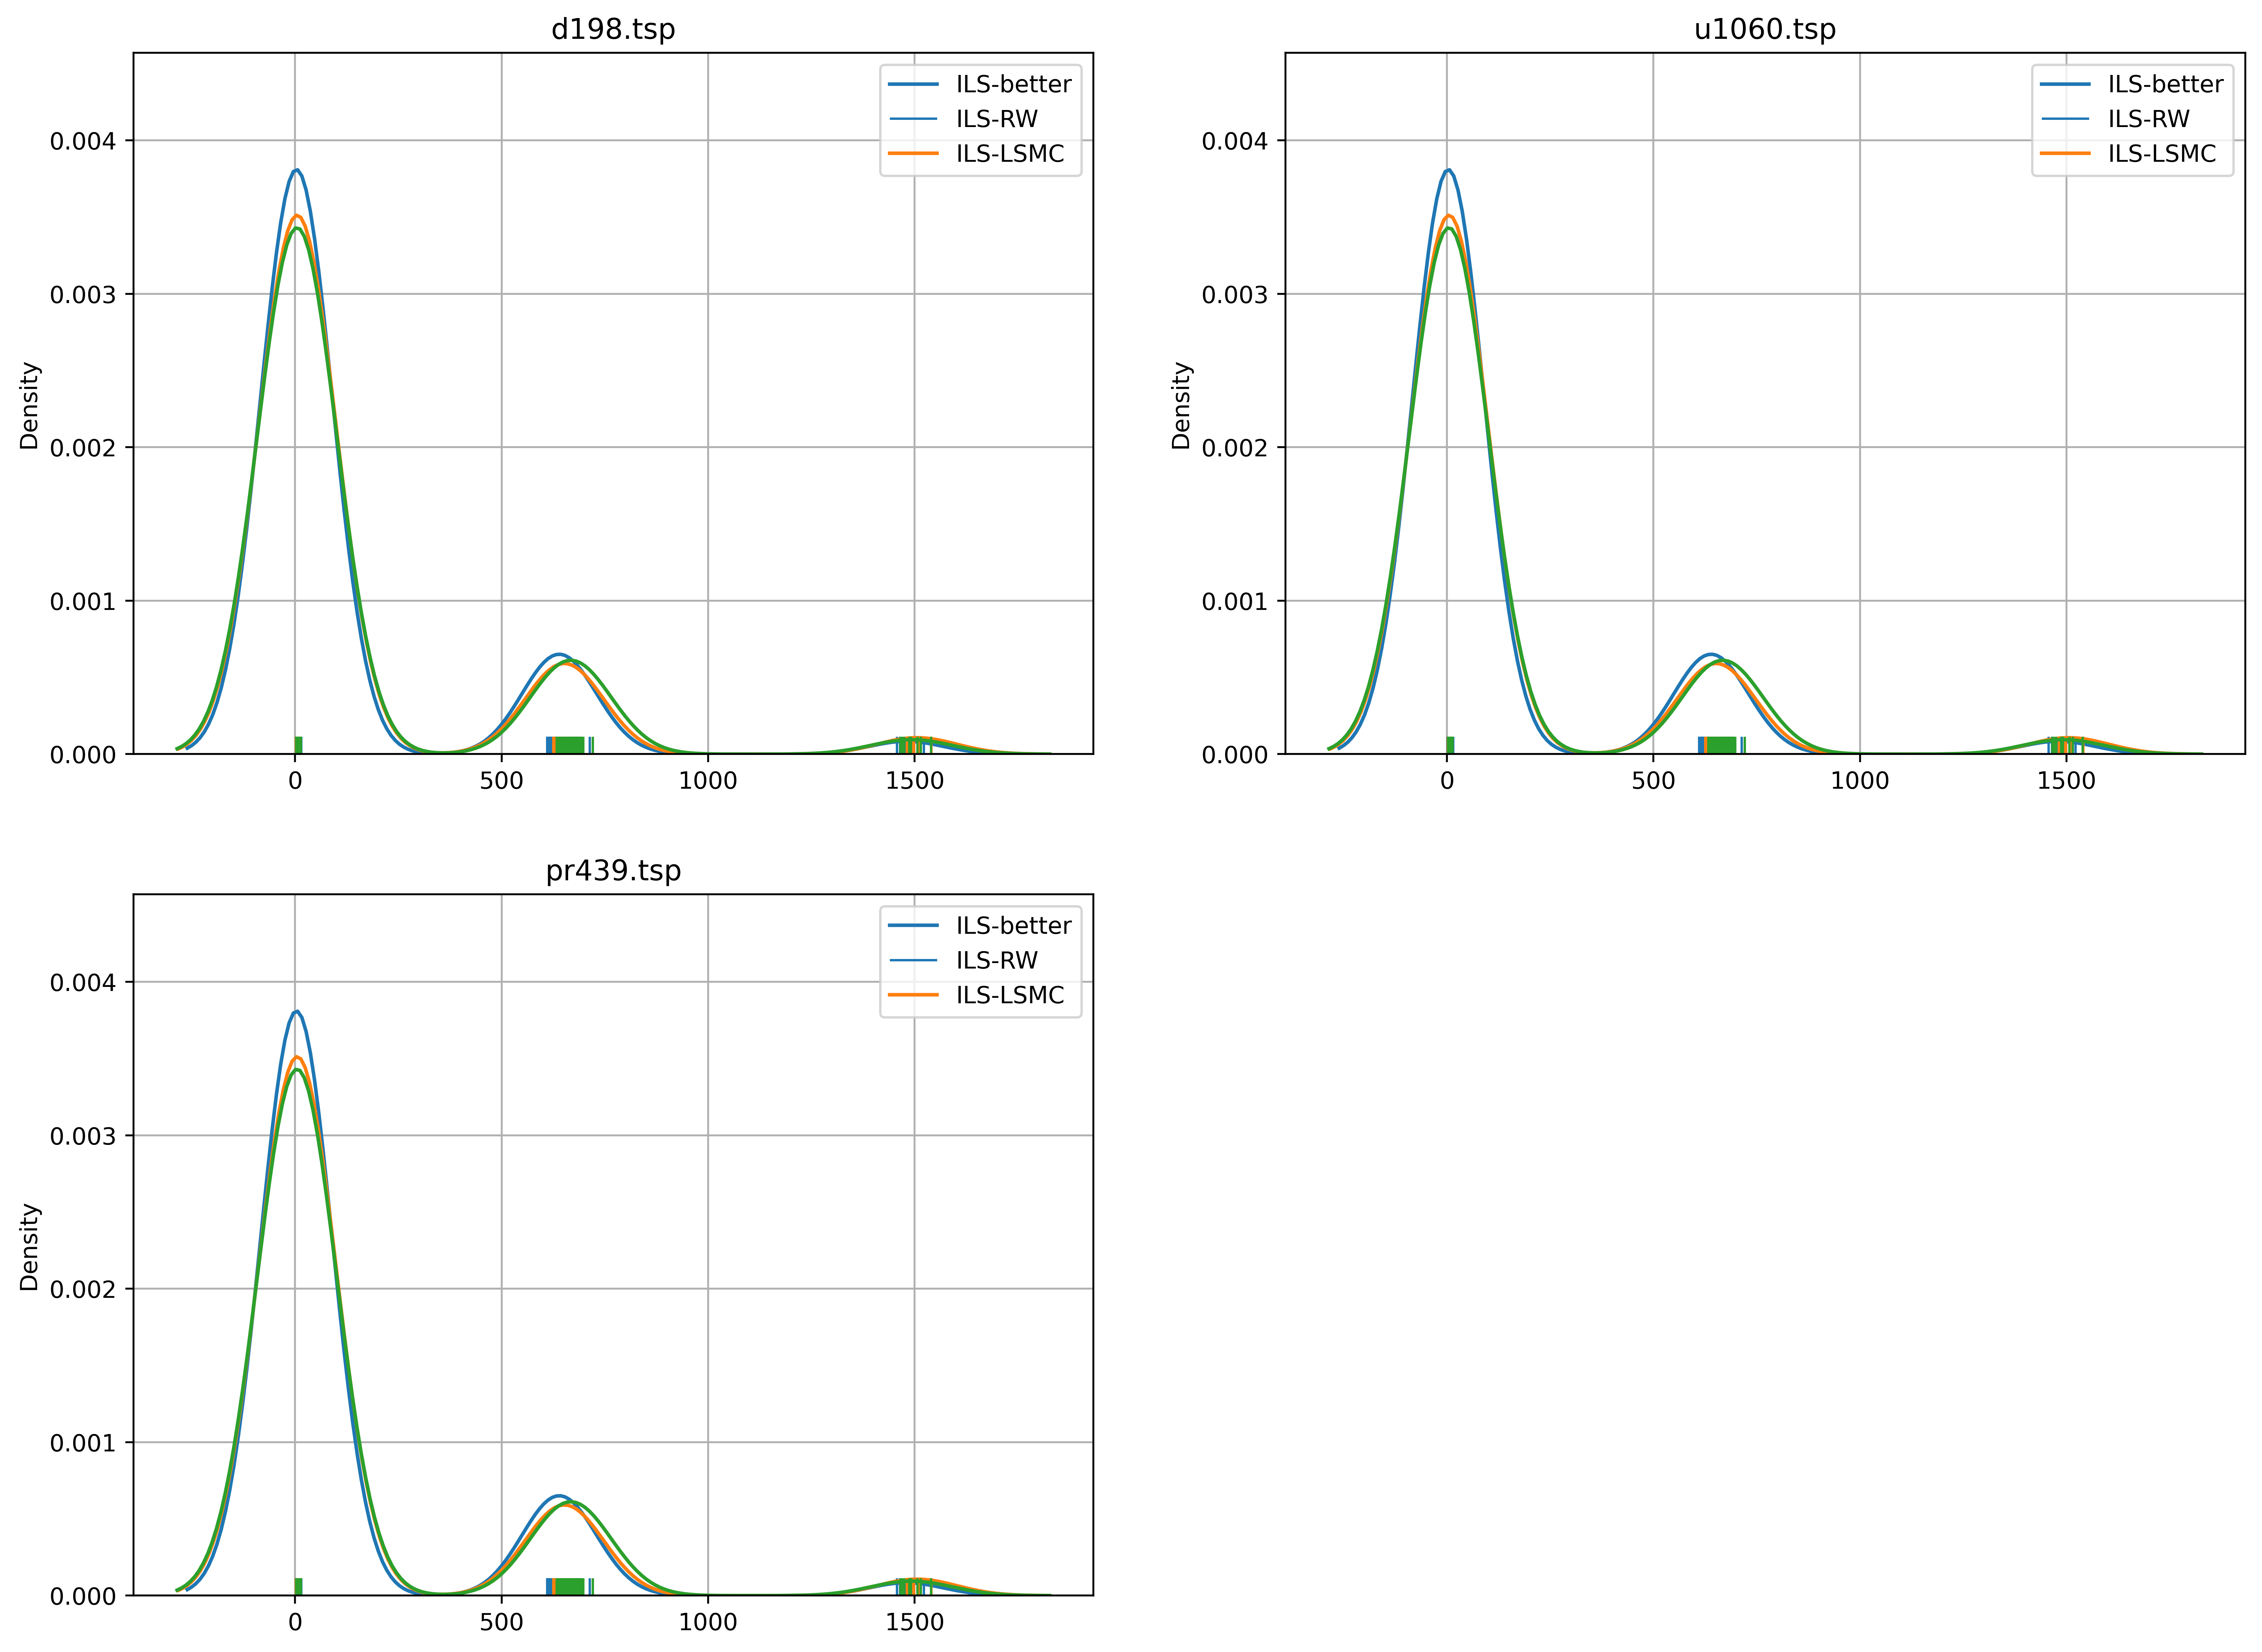

In [15]:

from turtle import color
import warnings
import seaborn as sns
number_of_colors = 3


print(color)
with warnings.catch_warnings():
  warnings.simplefilter("ignore")    
  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,12), dpi=500)
  col=0
  row=-1
  for instance in names_instances:
    row+=1
    #color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    #         for i in range(number_of_colors)]
    
    for j, improve in enumerate(improvements):
      #sns.histplot(samples[instance][improve],rug=True, ax=axes[row%2][col])
      sns.distplot(samples[instance][improve],rug=True,hist=False, ax=axes[row%2][col])
      
    axes[row%2][col].legend(labels=improvements, prop={'size': 10})
    axes[row%2][col].set_title(instance)
    axes[row%2][col].grid(visible=True)
    if(row %2==1):
          col+=1
  fig.delaxes(axes[1][1])
  
plt.show()
    